<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_ejemplos/1_edo_order_first/1_ejemplo_eq_first_order.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/edo/blob/main/banco_ejemplos/1_edo_order_first/1_ejemplo_eq_first_order.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 1_Ejemplo sobre ecuaciones diferenciales de primer orden

## Una ecuación diferencial que se puede resolver como ecuación de Bernoulli o interpretándola como ecuación diferencial separable



$$ \frac{dN}{dt} = \frac{1}{100}N^{2}, \ \ \ \ N(0) = 10  $$

## [Primer video de apoyo](https://www.youtube.com/watch?v=a5SR7LYxQT8)

## [Segundo video de apoyo](https://www.youtube.com/watch?v=iVh2FRlRSxY) 

## Solución con Sympy

In [1]:
from sympy import * 

In [2]:
t = symbols('t', real = True, nonegative = True)
N = symbols('N', real = True, positive = True) 

In [3]:
N = Function('N')(t)

In [4]:
eq_1 = Eq( diff(N,t) - (1/100)*N**2, 0) 

In [5]:
eq_1 

Eq(-0.01*N(t)**2 + Derivative(N(t), t), 0)

In [6]:
sol_ed = dsolve(eq_1,N) 
sol_ed 

Eq(N(t), -1/(C1 + 0.01*t))

In [7]:
C1 = symbols('C1') # Ojo, no restrinja a C1 a ser solo de valor real
C1 

C1

In [8]:
eq_2 = Eq(10, sol_ed.rhs.subs({t:0})) 
eq_2 

Eq(10, -1/C1)

In [9]:
sol_C1 = solve(eq_2, C1)   
# Note que la función solveset() actúa es sobre expresiones o sobre ecuaciones 
sol_C1 = sol_C1[0]
sol_C1 

-1/10

In [10]:
sol_pvi = sol_ed.subs({C1:sol_C1})  
sol_pvi 

Eq(N(t), -1/(0.01*t - 1/10))

## Verificación con Sympy

In [11]:
eq_1.subs({N:sol_pvi.rhs}).simplify() 

Eq(1.0/(0.1*t - 1)**2 - 1.0/(0.1*t - 1)**2, 0)

In [12]:
sol_pvi.subs({t:0}) 

Eq(N(0), 10)

### Conclusión de la verificación con sympy

Efectivamente, la función encontrada es solución del PVI pues satisface la ED y la condición inicial que lo conforma.

## Solución analítica 1: Interpretación de la ED como separable 

$$ \frac{dN}{dt} = \frac{1}{100}N^{2}, \ \ \ \ N(0) = 10  $$

$$ \frac{1}{N^{2}}dN = \frac{1}{100}dt $$

$$ \int \frac{1}{N^{2}}dN = \int \frac{1}{100}dt $$

$$ \int N^{-2}\ dN = \frac{1}{100}t + c $$

$$ -\frac{1}{N} = \frac{1}{100}t + c $$

$$ -\frac{1}{N} = \frac{t + 100c}{100} $$

$$ \frac{1}{N} = -\frac{t + 100c}{100} $$

$$N = -\frac{100}{t + 100c}$$

$$ N = -\frac{1}{0.01t + c} $$

### Conclusión de la aplicación de los dos anteriores métodos de solución

Con la calculadora simbólica Sympy de Python y con el método analítico obtuvimos la misma solución. 

## Solución analítica 1: Interpretación de la ED como Bernoulli de primer orden

$$ \frac{dN}{dt} = \frac{1}{100}N^{2}, \ \ \ \ N(0) = 10  $$

La forma estándar de Bernoulli correspondiente es:

$$ N' + p(t)N = g(t)N^{n}, \ \ \ \ n = 2 $$

El cambio de variable que nos sugieren es $v = N^{1 - 2} = N^{-1}$. 

## Gráfica del campo de pendientes 

Recordemos que el campo de pendientes asociado a una ED de primer orden es una representación geométrica de la ED. 

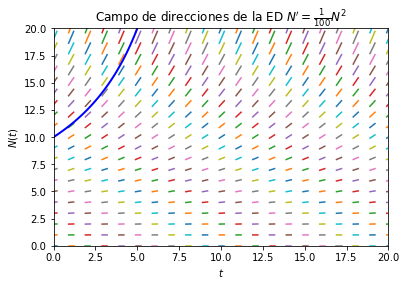

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 

# construcción de una grilla en el cuadrado [0,20] x [0,20]

x = np.arange(0,21)
y = x

X,Y = np.meshgrid(x,y) # los pares ordenados (x,y) construidos con las componentes
                       # correspondientes de estas dos matrices X y Y determinan la Grilla. 

def Np(N):               # 
    return (1/100)*N**2 

def N(t):
    return -1/(0.01*t - 0.1)

fig,ax = plt.subplots()  
    
for x,y in zip(X,Y):
    m_t = Np(y)
    x_ = np.linspace(x-0.1,x+0.2,2) # dominio del segmento tangente
    y_ = m_t*(x_ - x) + y
    ax.plot(x_,y_)

# m_t = N'(t,N(t)) = (1/100)N^{2}

ax.set(title = r"Campo de direcciones de la ED $N' = \frac{1}{100}N^{2}$", 
       xlabel = r'$t$', ylabel = r"$N(t)$", xlim = (0,20), ylim = (0,20))


t = np.linspace(0,10,100)
t = np.array( np.sort(list(set(t) - {10})))  

ax.plot(t,N(t), color = 'blue', linewidth = 2)  

plt.savefig('campo_direcciones_ejemplo_1.jpg')

plt.show() 


### Conclusión de la graficación del campo de direcciones y de la solución del PVI

Vemos que la función solución del PVI se acomoda bien al campo de direcciones.

## Funciones de Python utilizadas en este cuaderno

* El atributo `rhs` que tola el lado derecho de una ecuación de sympy.
* El operador `numpy.sort()` que ordena lista de Python
* El operador `Eq()` de sympy 
* 

## Referentes  

* Boyce and DiPrima.   

* https://www.geeksforgeeks.org/python-set-difference/